### Aim: The dataset is hosted by city of Los Angeles named as "Metro Bike Share Trip Data". We will be analyzing the use of metro bikes in order to build a bike network that really works.

# Introduction
This dataset is a catalogue of rides taken on the LA-Metro Bike Share Network.The Metro Bike Share system makes bikes available 24/7, 365 days a year in Downtown LA, Central LA, Port of LA and the Westside. Metro Bike Share offers convenient round-the-clock access to a fleet of bicycles for short trips. Metro Bike Share is one of LA Metro's multiple public transportation options for Angelenos and visitors to get around.

Feature descriptions from https://bikeshare.metro.net/about/data/

* trip_id: Locally unique integer that identifies the trip

* duration: Length of trip in seconds

* start_time: The date/time when the trip began, presented in ISO 8601 format in local time

* end_time: The date/time when the trip ended, presented in ISO 8601 format in local time

* start_station: The station ID where the trip originated

* start_lat: The latitude of the station where the trip originated

* start_lon: The longitude of the station where the trip originated

* end_station: The station ID where the trip terminated

* end_lat: The latitude of the station where the trip terminated

* end_lon: The longitude of the station where the trip terminated

* bike_id: Locally unique integer that identifies the bike

* plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)

* trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

* passholder_type: The name of the passholder's plan

Other features are not officially described by Metro Bike Share

Remaining features appear to be LA geographic information which we think is not relevant to our analysis, many of which include large amounts of missing data. So we have dropped those columns.

In [75]:
!pip install folium

In [76]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from Group_1_THE_ONE_Module import distance_on_unit_sphere
from Group_1_THE_ONE_Module import modeling_techniques_and_prediction

# Data Extraction

In [77]:
metro_bike_trip_df =  pd.read_csv("metro-bike-share-trip-data.csv")
metro_bike_trip_df.head(6)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Replacing the column name space with "_" for easier name conversion
metro_bike_trip_df.columns = metro_bike_trip_df.columns.str.replace(' ','_')
metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,Neighborhood_Councils_(Certified),Council_Districts,Zip_Codes,LA_Specific_Plans,Precinct_Boundaries,Census_Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Trip_ID                            132427 non-null  int64  
 1   Duration                           132427 non-null  int64  
 2   Start_Time                         132427 non-null  object 
 3   End_Time                           132427 non-null  object 
 4   Starting_Station_ID                132408 non-null  float64
 5   Starting_Station_Latitude          132379 non-null  float64
 6   Starting_Station_Longitude         132379 non-null  float64
 7   Ending_Station_ID                  132331 non-null  float64
 8   Ending_Station_Latitude            131376 non-null  float64
 9   Ending_Station_Longitude           131376 non-null  float64
 10  Bike_ID                            132417 non-null  float64
 11  Plan_Duration                      1316

In [80]:
print("shape:", metro_bike_trip_df.shape)

shape: (132427, 22)


In [81]:
# Changing Start and End Time values to datetime format
metro_bike_trip_df['Start_Time']=pd.to_datetime(metro_bike_trip_df['Start_Time'])
metro_bike_trip_df['End_Time']=pd.to_datetime(metro_bike_trip_df['End_Time'])
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Trip_ID                            132427 non-null  int64         
 1   Duration                           132427 non-null  int64         
 2   Start_Time                         132427 non-null  datetime64[ns]
 3   End_Time                           132427 non-null  datetime64[ns]
 4   Starting_Station_ID                132408 non-null  float64       
 5   Starting_Station_Latitude          132379 non-null  float64       
 6   Starting_Station_Longitude         132379 non-null  float64       
 7   Ending_Station_ID                  132331 non-null  float64       
 8   Ending_Station_Latitude            131376 non-null  float64       
 9   Ending_Station_Longitude           131376 non-null  float64       
 10  Bike_ID             

# Data Cleaning

In [82]:
# Finding the null values in each column
metro_bike_trip_df.isnull().sum()

Trip_ID                                   0
Duration                                  0
Start_Time                                0
End_Time                                  0
Starting_Station_ID                      19
Starting_Station_Latitude                48
Starting_Station_Longitude               48
Ending_Station_ID                        96
Ending_Station_Latitude                1051
Ending_Station_Longitude               1051
Bike_ID                                  10
Plan_Duration                           766
Trip_Route_Category                       0
Passholder_Type                           0
Starting_Lat-Long                     33805
Ending_Lat-Long                        1051
Neighborhood_Councils_(Certified)     33837
Council_Districts                     33837
Zip_Codes                             33837
LA_Specific_Plans                    116590
Precinct_Boundaries                    1099
Census_Tracts                          1099
dtype: int64

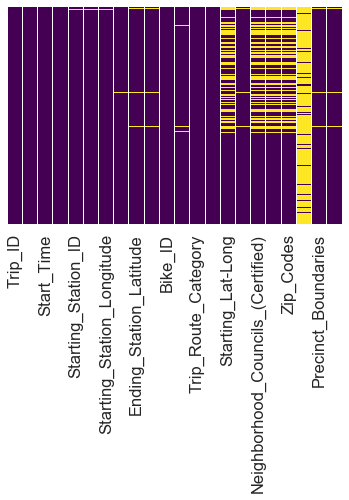

In [83]:
# Visually representing the null values of different columns using heatmap
sns.heatmap(metro_bike_trip_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
# Dropping below columns due to lack of data and more of null values
metro_bike_trip_df.drop(columns=['Neighborhood_Councils_(Certified)',
                 'Council_Districts',
                 'Zip_Codes',
                 'LA_Specific_Plans',
                 'Precinct_Boundaries',
                 'Census_Tracts'],
       inplace=True)

In [85]:
# Droping the na values from the metro bike trip data
metro_bike_trip_df = metro_bike_trip_df.dropna()
metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97825 entries, 2088 to 132426
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Trip_ID                     97825 non-null  int64         
 1   Duration                    97825 non-null  int64         
 2   Start_Time                  97825 non-null  datetime64[ns]
 3   End_Time                    97825 non-null  datetime64[ns]
 4   Starting_Station_ID         97825 non-null  float64       
 5   Starting_Station_Latitude   97825 non-null  float64       
 6   Starting_Station_Longitude  97825 non-null  float64       
 7   Ending_Station_ID           97825 non-null  float64       
 8   Ending_Station_Latitude     97825 non-null  float64       
 9   Ending_Station_Longitude    97825 non-null  float64       
 10  Bike_ID                     97825 non-null  float64       
 11  Plan_Duration               97825 non-null  float6

In [124]:
# Change format of station and bike ID's to integer.
metro_bike_trip_df['Starting_Station_ID'] = metro_bike_trip_df.Starting_Station_ID.astype(int)
metro_bike_trip_df['Ending_Station_ID'] = metro_bike_trip_df.Ending_Station_ID.astype(int)
metro_bike_trip_df['Bike_ID'] = metro_bike_trip_df.Bike_ID.astype(int)

# Extract the weekday integer from Start_Time timestamp to the Weekday
# Had to use lambda expressions to apply the weekday to each object since it doesnt function on a series object
df_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
metro_bike_trip_df['Weekday'] = metro_bike_trip_df.apply(lambda x:
                                                        df_weekday[x['Start_Time'].weekday()], axis = 1)

metro_bike_trip_df.head(5)

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Plan_Duration,Trip_Route_Category,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,new_start_date,new_start_time,new_end_date,new_end_time,Weekday
2088,2023364,33.0,2016-07-08 09:24:00,2016-07-08 09:57:00,3045,34.028511,-118.256670,3045,34.028511,-118.256670,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",2016-07-08,09:24:00,2016-07-08,09:57:00,Friday
2089,2027211,3.0,2016-07-08 10:40:00,2016-07-08 10:43:00,4108,34.025890,-118.238243,4108,34.025890,-118.238243,...,30.0,Round Trip,Monthly Pass,"{'longitude': '0.0', 'latitude': '0.0'}","{'longitude': '0.0', 'latitude': '0.0'}",2016-07-08,10:40:00,2016-07-08,10:43:00,Friday
2090,2035311,13.0,2016-07-08 12:42:00,2016-07-08 12:55:00,3029,34.048851,-118.246420,3029,34.048851,-118.246420,...,0.0,Round Trip,Walk-up,"{'longitude': '-118.24642', 'latitude': '34.04...","{'longitude': '-118.24642', 'latitude': '34.04...",2016-07-08,12:42:00,2016-07-08,12:55:00,Friday
2091,2182651,74.0,2016-07-09 19:08:00,2016-07-09 20:22:00,3045,34.028511,-118.256670,3045,34.028511,-118.256670,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",2016-07-09,19:08:00,2016-07-09,20:22:00,Saturday
2092,2286870,87.0,2016-07-10 10:56:00,2016-07-10 12:23:00,3045,34.028511,-118.256670,3045,34.028511,-118.256670,...,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25667', 'latitude': '34.02...","{'longitude': '-118.25667', 'latitude': '34.02...",2016-07-10,10:56:00,2016-07-10,12:23:00,Sunday


In [125]:
# Now we will find the total number of stations and total number of bikes 
print("Total number of Starting stations:", metro_bike_trip_df.Starting_Station_ID.nunique())
print("Total number of Ending stations:", metro_bike_trip_df.Ending_Station_ID.nunique())
print("Total number of bikes:",metro_bike_trip_df.Bike_ID.nunique())

Total number of Starting stations: 64
Total number of Ending stations: 64
Total number of bikes: 762


# Performing Exploratory Data Analysis for the Bike Trip Data

* ## Finding the trip route category and ploting it in the form of bar graph

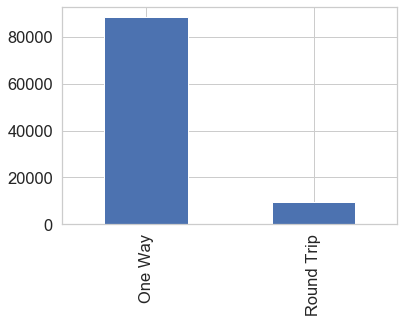

In [126]:
# Finding the trip route category and ploting it in the form of bar graph
metro_bike_trip_df.Trip_Route_Category.value_counts().plot(kind='bar')
plt.show()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Trip Categories'),
 Text(0.5, 1.0, 'Comparison of Overall Trip Route categories in the available dataset')]

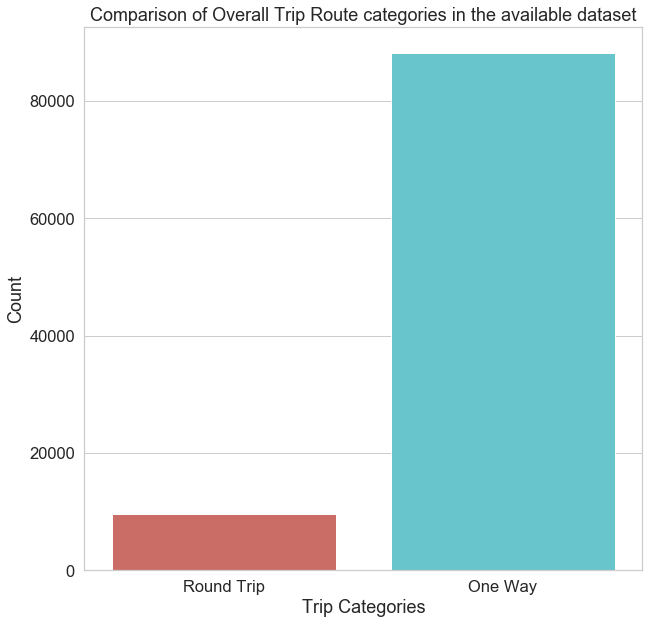

In [127]:
# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 overall comparison of Trip Route Category
# Plot 2 weekday Trip Route Category
fig, (ax1) = plt.subplots(nrows=1, sharey=True, figsize=(10, 10))

sns.countplot(
    x = "Trip_Route_Category", 
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "hls").set(
        title = 'Comparison of Overall Trip Route categories in the available dataset', 
        xlabel = 'Trip Categories', 
        ylabel = 'Count')


### Inference:
> ### This provides us a insight into the general tendency of a rider.  The EDA points to the likelyhood that a higher percentage of riders wants to use the bike for a one way trip.  As we can see the maximum trip is one way which basically means people usually start at one location and end on different location.  

* ## Finding the trip route category per weekday and ploting it in the form of bar graph

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Comparison of Weekday Trip Count')]

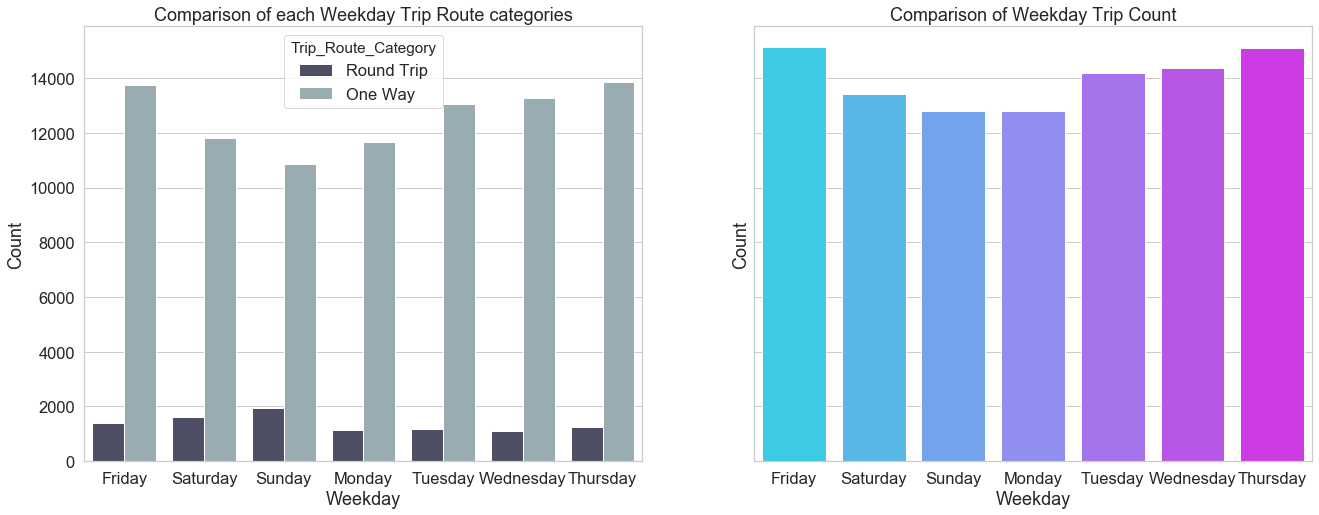

In [135]:
# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(22, 8))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.countplot(
    x = "Weekday",
    hue = "Trip_Route_Category", 
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "bone").set(
        title = 'Comparison of each Weekday Trip Route categories', 
        xlabel = 'Weekday', 
        ylabel = 'Count')

sns.countplot(
    x = "Weekday",
    data = metro_bike_trip_df, 
    ax = ax2,
    palette = "cool").set(
        title = 'Comparison of Weekday Trip Count', 
        xlabel = 'Weekday', 
        ylabel = 'Count')

### Inference:
> ### The above graph also supports the previous analysis that even during weekdays the general tendency of preferring One Way trip over Round Trip by the customers.  However, we also see a slight increase of Round Trip riders during weekends, i.e. Saturday and Sunday and a similar drop in the One Way riders.

> ### This also could be due to the fact that overal number of riders reduced during weekends since some regular riders may prefer to stay home compared to a regular weekday while the tourists or younger population would prefer to go out and chill.

> ### It would make sense to plot out a weeday rider count comparison to give a better idea about rider count changes during the week.  So hence the second graph.  

> ### The second graph provide a little bit more view into a drop of rider counts during Sunday.  But the interesting thing to note here is that there is drop in rider count on Monday also.


* ### Busiest Bike by Times
* ### Visual of most used bike based on Number of Trips - WHICH BIKE IS USED THE MOST

In [89]:
#Busiest Bike by Times 
bike_use_df = pd.DataFrame()
bike_use_df = metro_bike_trip_df.groupby(['Bike_ID']).size().reset_index(name = 'Number of Times Used')
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['Bike_ID'] = bike_use_df['Bike_ID'].astype(str)
bike_use_df['Bike_ID'] = ('Bike ' + bike_use_df['Bike_ID'])
bike_use_df = bike_use_df.reset_index()

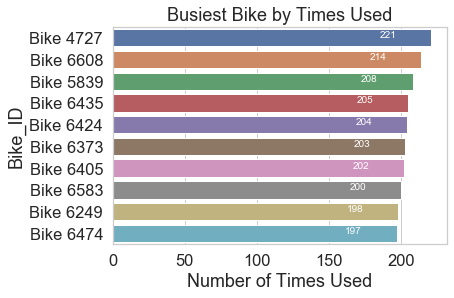

In [90]:
#Visual of most used bike based on Number of Trips
g = sns.barplot('Number of Times Used','Bike_ID', data = bike_use_df)
plt.title("Busiest Bike by Times Used")
for index, row in bike_use_df.iterrows():
    g.text(row['Number of Times Used']-30,index,row['Number of Times Used'], 
             color='white', ha="center",fontsize = 10)
plt.show()

[Text(0, 0.5, 'Bike'),
 Text(0.5, 0, 'Number of Times Used'),
 Text(0.5, 1.0, 'Comparison of Top 10 Used Bike in LA')]

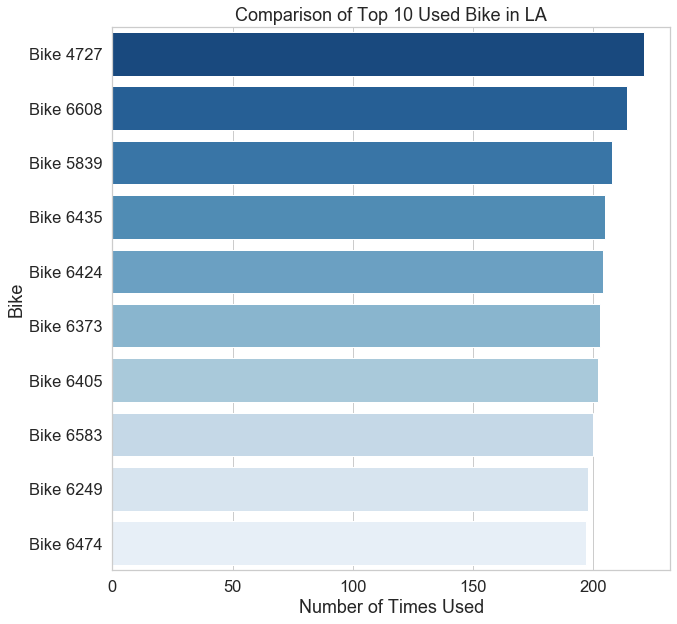

In [152]:
# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(10, 10))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.barplot(
    x = "Number of Times Used",
    y = "Bike_ID",
    data = bike_use_df,
    ax = ax1,
    palette = "Blues_r").set(
        title = 'Comparison of Top 10 Used Bike in LA', 
        xlabel = 'Number of Times Used', 
        ylabel = 'Bike')


In [153]:
bike_use_df.nlargest(5, ["Number of Times Used"], keep = "all")

,index,Bike_ID,Number of Times Used
0,0,Bike 4727,221
1,693,Bike 6608,214
2,98,Bike 5839,208
3,570,Bike 6435,205
4,560,Bike 6424,204


### Inference:
> ### Based on the top 5 used bikes graph and the above statements, we get to see that 4727 bike id is the most used bike amoung all the other bikes.  This has been used 221 times.

* ## Popular start station and end station
> ### Intro: Following section will focus on finding the most popular starting and ending location.

In [158]:
#popular start station and end station
print("\nPopular 5 Start stations: \n",metro_bike_trip_df.Starting_Station_ID.value_counts().head())
print("\nPopular 5 End stations: \n",metro_bike_trip_df.Ending_Station_ID.value_counts().head())

#Finding the maximum and minimum trip duration
print("\nThe maximum trip duration:",metro_bike_trip_df.Duration.max())
print("\nThe minimum trip duration:",metro_bike_trip_df.Duration.min())


Popular 5 Start stations: 
 3030    3778
3069    3726
3005    3613
3014    3497
3031    3444
Name: Starting_Station_ID, dtype: int64

Popular 5 End stations: 
 3005    4615
3031    4176
3014    4096
3042    3865
3069    3623
Name: Ending_Station_ID, dtype: int64

The maximum trip duration: 1440.0

The minimum trip duration: 1.0


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Ending Station ID'),
 Text(0.5, 1.0, 'Comparison of Top 5 Ending Stations')]

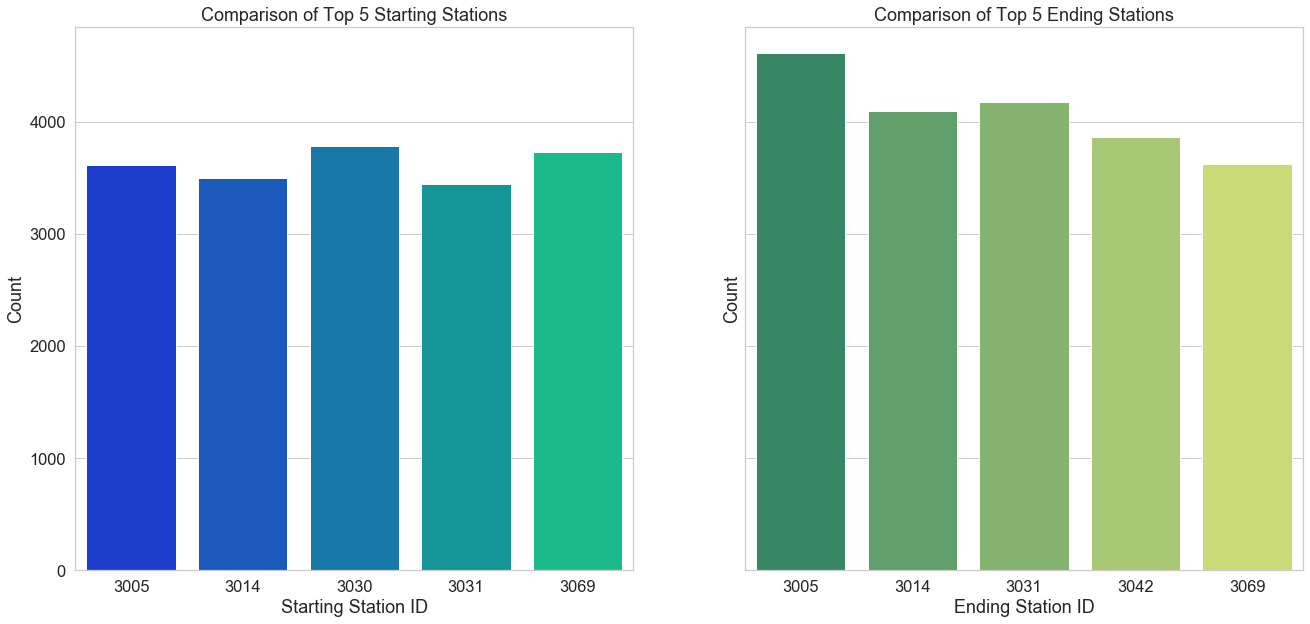

In [164]:
# Prepare data with station counts
ss_count = metro_bike_trip_df.groupby(['Starting_Station_ID']).size().to_frame('ss_count')
es_count = metro_bike_trip_df.groupby(['Ending_Station_ID']).size().to_frame('es_count')
stations_count = pd.merge(ss_count, es_count, right_index=True, left_index=True)
stations_count['Station_ID'] = stations_count.index

# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 Top 5 starting station counts
# Plot 2 Top 5 ending stations
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(22, 10))

# Plot a countplot with 
# x axis as Stations ID's
# y axis as Count of starting and ending ride count
sns.barplot(
    x = "Station_ID",
    y = "ss_count",
    data = stations_count.nlargest(5, ["ss_count"], keep = "all"),
    ax = ax1,
    palette = "winter").set(
        title = 'Comparison of Top 5 Starting Stations', 
        xlabel = 'Starting Station ID', 
        ylabel = 'Count')

sns.barplot(
    x = "Station_ID",
    y = "es_count",
    data = stations_count.nlargest(5, ["es_count"], keep = "all"),
    ax = ax2,
    palette = "summer").set(
        title = 'Comparison of Top 5 Ending Stations', 
        xlabel = 'Ending Station ID', 
        ylabel = 'Count')


> ### Top pickup station

In [166]:
stations_count.nlargest(1, ["ss_count"], keep = "all")

,ss_count,es_count,Station_ID
Starting_Station_ID,,,
3030,3778,3255,3030


> ### Top Drop station

In [167]:
stations_count.nlargest(1, ["es_count"], keep = "all")

,ss_count,es_count,Station_ID
Starting_Station_ID,,,
3005,3613,4615,3005


### Inference:
> ### The above group give us an indication that the station id 3030, 3069 and 3005 are top 3 favorites as a pickup location, while the station 3005, 3014 and 3031 are the top 3 drop locations.  The commonality is 3005 station id that get very heavy traffic of bike pick and drops indication a high churn and demand in that one particular location in addition to the other top stations.

> ### Due to lack of proper station identification, we are not able to provide station names in this analysis.

* ## Plot the locations of the stations on a map

In [92]:
metro_bike_trip_df.describe()

,Trip_ID,Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration
count,9.782500e+04,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,8.451612e+06,1362.284896,3042.024626,34.036437,-118.211316,3041.553274,34.030414,-118.191661,6193.698451,45.319244
std,4.111924e+06,4679.233275,29.756843,0.615729,2.138390,33.035783,0.754025,2.618753,291.605995,91.195493
min,1.912818e+06,60.000000,3005.000000,0.000000,-118.270813,3005.000000,0.000000,-118.270813,4727.000000,0.000000
25%,5.050101e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256980,5957.000000,0.000000
50%,7.086248e+06,600.000000,3038.000000,34.046822,-118.250954,3038.000000,34.046810,-118.251579,6186.000000,30.000000
75%,1.195715e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238937,6431.000000,30.000000
max,1.710164e+07,86400.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000


> ### Starting Station Latitude, Starting Station Longitude, Ending Station Latitude & Ending Station Longitude contain zeros that must be treated as missing data. However, there are no zeros or any remaining missing values in Starting Station ID or Ending Station ID, we can use these values to impute the missing data

In [93]:
print(metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_Latitude']==0]['Starting_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_Longitude']==0]['Starting_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Ending_Station_Latitude']==0]['Ending_Station_ID'].value_counts())
print(metro_bike_trip_df.loc[metro_bike_trip_df['Ending_Station_Longitude']==0]['Ending_Station_ID'].value_counts())

4108    32
Name: Starting_Station_ID, dtype: int64
4108    32
Name: Starting_Station_ID, dtype: int64
4108    48
Name: Ending_Station_ID, dtype: int64
4108    48
Name: Ending_Station_ID, dtype: int64


> ### All of the zeros were recorded at Bike Station 4108, there may be some kind of error related to this particular Bike Station. The values of this bike station's latitude and Longitude can be found in any of the complete values and imputed over the zeros.

In [94]:
stat_4108_lat= metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==4108]['Starting_Station_Latitude'].max() #use max to avoid the zeros
stat_4108_long= metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==4108]['Starting_Station_Longitude'].min()
 #all non-zeroes are the same anyway no need to find and replace
metro_bike_trip_df['Starting_Station_Latitude'].replace(0,stat_4108_lat,inplace=True)
metro_bike_trip_df['Ending_Station_Latitude'].replace(0,stat_4108_lat,inplace=True)
metro_bike_trip_df['Starting_Station_Longitude'].replace(0,stat_4108_long,inplace=True)
metro_bike_trip_df['Ending_Station_Longitude'].replace(0,stat_4108_long,inplace=True)

In [95]:
metro_bike_trip_df.describe()

,Trip_ID,Duration,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,Bike_ID,Plan_Duration
count,9.782500e+04,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000,97825.000000
mean,8.451612e+06,1362.284896,3042.024626,34.047567,-118.249993,3041.553274,34.047109,-118.249678,6193.698451,45.319244
std,4.111924e+06,4679.233275,29.756843,0.006210,0.009724,33.035783,0.006111,0.010060,291.605995,91.195493
min,1.912818e+06,60.000000,3005.000000,34.025890,-118.270813,3005.000000,34.025890,-118.270813,4727.000000,0.000000
25%,5.050101e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256980,5957.000000,0.000000
50%,7.086248e+06,600.000000,3038.000000,34.046822,-118.250954,3038.000000,34.046810,-118.251579,6186.000000,30.000000
75%,1.195715e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238937,6431.000000,30.000000
max,1.710164e+07,86400.000000,4108.000000,34.064281,-118.231277,4108.000000,34.064281,-118.231277,6728.000000,365.000000


> ### The dataset is now free of missing values

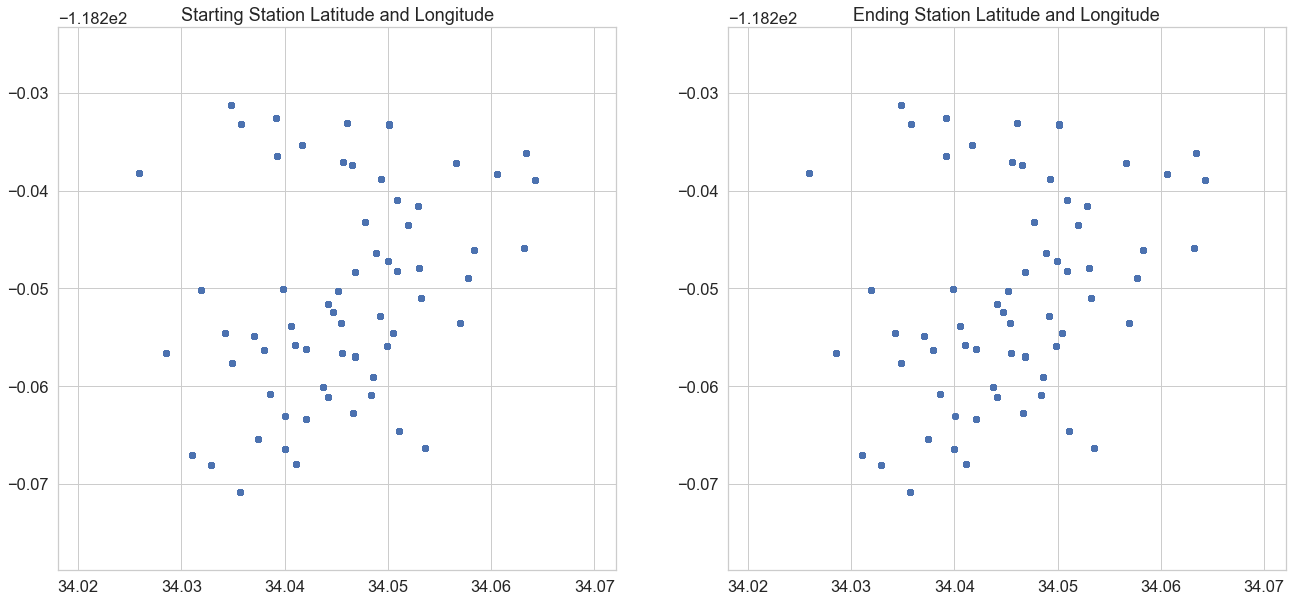

In [170]:
plt.figure(figsize=(22,10))
plt.subplot(1,2,1)
plt.scatter(metro_bike_trip_df['Starting_Station_Latitude'],metro_bike_trip_df['Starting_Station_Longitude'],alpha=0.3)
plt.title("Starting Station Latitude and Longitude")
plt.subplot(1,2,2)
plt.scatter(metro_bike_trip_df['Ending_Station_Latitude'],metro_bike_trip_df['Ending_Station_Longitude'],alpha=0.3)
plt.title("Ending Station Latitude and Longitude")
plt.show()

> ### Matching plots indicate there are no start points that had no drop off and vice-versa this would seem logical

In [97]:
sorted(metro_bike_trip_df['Starting_Station_ID'].unique())==sorted(metro_bike_trip_df['Ending_Station_ID'].unique())

True

> ### This confirms that the Starting and Ending Stations sets are identical as expected

* ## Display the location of starting stations on a map
> ### Use the mean of starting station longitude and latitude as a starting point of the map.

In [182]:
bike_map1=folium.Map([metro_bike_trip_df.Starting_Station_Latitude.mean(),
                      metro_bike_trip_df.Starting_Station_Longitude.mean()],
                    zoom_start=14)
for station in metro_bike_trip_df['Starting_Station_ID'].unique():
    lat=metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==station]['Starting_Station_Latitude'].values[0]
    lon=metro_bike_trip_df.loc[metro_bike_trip_df['Starting_Station_ID']==station]['Starting_Station_Longitude'].values[0]
    marker=folium.Marker([lat,lon],popup=str(station))
    marker.add_to(bike_map1)

bike_map1

#### All the Bike Stations are located in Downtown LA.

* ### Finding the maximum and minimum trip duration

> Following is the maximum duration trip from the dataset.

In [185]:
# Prepare the dataframe to contain total trip duration in seconds that can be used to find the max duration trip and min duration trip
metro_bike_trip_df['Trip_Duration'] = metro_bike_trip_df.End_Time - metro_bike_trip_df.Start_Time
metro_bike_trip_df['Trip_Duration_Seconds'] = metro_bike_trip_df.Trip_Duration.dt.total_seconds()

metro_bike_trip_df.nlargest(1, ['Trip_Duration_Seconds'], keep = 'all')

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,new_start_date,new_start_time,new_end_date,new_end_time,Weekday,Trip_Duration,Trip_Duration_Seconds
123643,5082350,1440.0,2016-08-15 21:13:00,2016-08-21 13:41:00,3010,34.037048,-118.25487,3055,34.044159,-118.25158,...,Monthly Pass,"{'longitude': '-118.25487', 'latitude': '34.03...","{'longitude': '-118.25158', 'latitude': '34.04...",2016-08-15,21:13:00,2016-08-21,13:41:00,Monday,5 days 16:28:00,491280.0


> Following are the minimum duration trip from the dataset.

In [186]:
metro_bike_trip_df.nsmallest(1, ['Trip_Duration_Seconds'], keep = 'all')

,Trip_ID,Duration,Start_Time,End_Time,Starting_Station_ID,Starting_Station_Latitude,Starting_Station_Longitude,Ending_Station_ID,Ending_Station_Latitude,Ending_Station_Longitude,...,Passholder_Type,Starting_Lat-Long,Ending_Lat-Long,new_start_date,new_start_time,new_end_date,new_end_time,Weekday,Trip_Duration,Trip_Duration_Seconds
2415,12998065,1.0,2016-11-10 21:28:00,2016-11-10 21:29:00,3064,34.046810,-118.256981,3064,34.046810,-118.256981,...,Walk-up,"{'longitude': '-118.256981', 'latitude': '34.0...","{'longitude': '-118.256981', 'latitude': '34.0...",2016-11-10,21:28:00,2016-11-10,21:29:00,Thursday,00:01:00,60.0
2846,11586730,1.0,2016-10-28 13:58:00,2016-10-28 13:59:00,3064,34.046810,-118.256981,3064,34.046810,-118.256981,...,Monthly Pass,"{'longitude': '-118.256981', 'latitude': '34.0...","{'longitude': '-118.256981', 'latitude': '34.0...",2016-10-28,13:58:00,2016-10-28,13:59:00,Friday,00:01:00,60.0
3021,15124543,1.0,2016-12-04 23:32:00,2016-12-04 23:33:00,3030,34.051941,-118.243530,3042,34.049301,-118.238808,...,Monthly Pass,"{'longitude': '-118.24353', 'latitude': '34.05...","{'longitude': '-118.238808', 'latitude': '34.0...",2016-12-04,23:32:00,2016-12-04,23:33:00,Sunday,00:01:00,60.0
3386,16385712,1.0,2016-12-20 11:59:00,2016-12-20 12:00:00,3069,34.050880,-118.248253,3069,34.050880,-118.248253,...,Monthly Pass,"{'longitude': '-118.248253', 'latitude': '34.0...","{'longitude': '-118.248253', 'latitude': '34.0...",2016-12-20,11:59:00,2016-12-20,12:00:00,Tuesday,00:01:00,60.0
3438,16533965,1.0,2016-12-22 17:13:00,2016-12-22 17:14:00,3056,34.037460,-118.265381,3047,34.039982,-118.266403,...,Monthly Pass,"{'longitude': '-118.265381', 'latitude': '34.0...","{'longitude': '-118.266403', 'latitude': '34.0...",2016-12-22,17:13:00,2016-12-22,17:14:00,Thursday,00:01:00,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76226,15661164,1.0,2016-12-11 01:25:00,2016-12-11 01:26:00,3016,34.052898,-118.241562,3030,34.051941,-118.243530,...,Monthly Pass,"{'longitude': '-118.241562', 'latitude': '34.0...","{'longitude': '-118.24353', 'latitude': '34.05...",2016-12-11,01:25:00,2016-12-11,01:26:00,Sunday,00:01:00,60.0
76456,11369691,1.0,2016-10-26 07:07:00,2016-10-26 07:08:00,3055,34.044159,-118.251579,3055,34.044159,-118.251579,...,Monthly Pass,"{'longitude': '-118.251579', 'latitude': '34.0...","{'longitude': '-118.251579', 'latitude': '34.0...",2016-10-26,07:07:00,2016-10-26,07:08:00,Wednesday,00:01:00,60.0
76488,10098199,1.0,2016-10-15 13:54:00,2016-10-15 13:55:00,3074,34.044170,-118.261169,3034,34.042061,-118.263382,...,Monthly Pass,"{'longitude': '-118.261169', 'latitude': '34.0...","{'longitude': '-118.263382', 'latitude': '34.0...",2016-10-15,13:54:00,2016-10-15,13:55:00,Saturday,00:01:00,60.0
76760,8554496,1.0,2016-10-02 15:54:00,2016-10-02 15:55:00,3031,34.044701,-118.252441,3031,34.044701,-118.252441,...,Walk-up,"{'longitude': '-118.252441', 'latitude': '34.0...","{'longitude': '-118.252441', 'latitude': '34.0...",2016-10-02,15:54:00,2016-10-02,15:55:00,Sunday,00:01:00,60.0


* ## Business hours periods that bike rentals are at peak. 
* ## Finding the most popular pick up time of any bike.

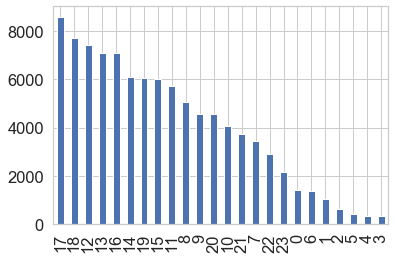

In [99]:
# Finding the most popular pick up time of any bike 
metro_bike_trip_df.Start_Time.dt.hour.value_counts().plot(kind='bar')
plt.show()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Drop Window'),
 Text(0.5, 1.0, 'Comparison of Peak Drop Windows')]

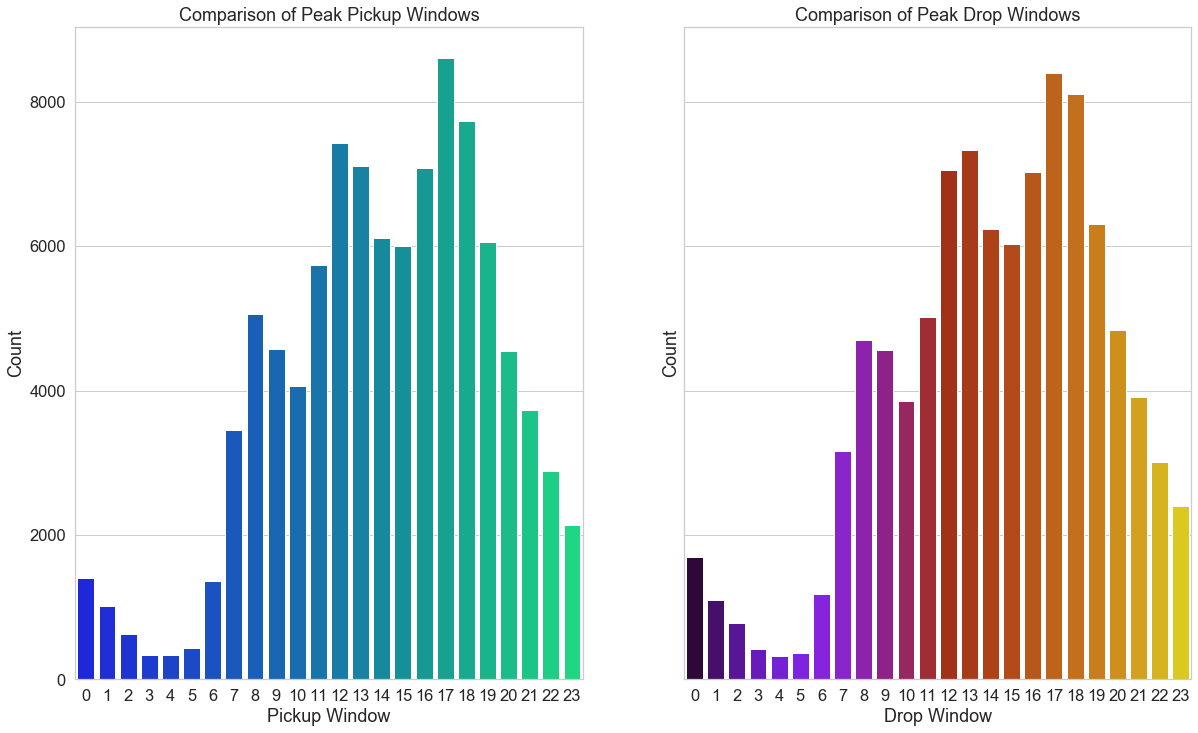

In [187]:
# Prepare the hourly window of pickup and drop
metro_bike_trip_df['Pickup_Window'] = metro_bike_trip_df['Start_Time'].dt.hour
metro_bike_trip_df['Drop_Window'] = metro_bike_trip_df['End_Time'].dt.hour

# Set style to whitegrid for better readability
sns.set(style="whitegrid", font_scale=1.5)

# Plot two countplot with 
# x axis as Trip Route Category eg, One Way or Round Trip
# y axis as count of trips
# Plot 1 weekday Trip Route Category
# Plot 2 weekday trip count plots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 12))

# Plot a countplot with 
# x axis as Weekday 
# y axis as count of trips per weekday
# Trip Route Category eg, One Way or Round Trip
sns.countplot(
    x = "Pickup_Window",
    data = metro_bike_trip_df, 
    ax = ax1,
    palette = "winter").set(
        title = 'Comparison of Peak Pickup Windows', 
        xlabel = 'Pickup Window', 
        ylabel = 'Count')

sns.countplot(
    x = "Drop_Window",
    data = metro_bike_trip_df, 
    ax = ax2,
    palette = "gnuplot").set(
        title = 'Comparison of Peak Drop Windows', 
        xlabel = 'Drop Window', 
        ylabel = 'Count')

> ### The above analysis give us insight regarding the peak pickup and drop windows.  The peak times for both pickup and drop is a 4 hour window between evening 4:00 P.M. to 7:00 P.M. and there is also 2 hour peak during lunch hours of 11:00 A.M. to 12:00 P.M.  There is sharp drop of pick and drop after midnight and it is justified by most people at home sleeping tight.

* ## Finding the most popular trip

In [100]:
# Finding the most popular trip
trips_df = pd.DataFrame()
trips_df = metro_bike_trip_df.groupby(['Starting_Station_ID','Ending_Station_ID']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df['Starting_Station_ID'] = trips_df['Starting_Station_ID'].astype('str')
trips_df['Ending_Station_ID'] = trips_df['Ending_Station_ID'].astype('str')
trips_df["Trip"] = trips_df["Starting_Station_ID"] + " to " + trips_df["Ending_Station_ID"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['Starting_Station_ID', "Ending_Station_ID"], axis = 1)
trips_df = trips_df.reset_index()

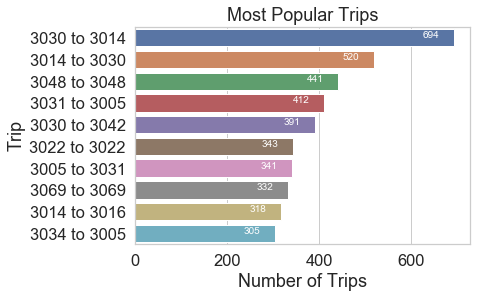

In [101]:
# Most popular trips
g = sns.barplot('Number of Trips','Trip', data = trips_df)
plt.title("Most Popular Trips")
for index, row in trips_df.iterrows():
    g.text(row['Number of Trips']-50,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

#### Since the popular trip are very high, such stations should always be looked after and maintained. Such stations should never go out of bikes as people over there prefer to use bikes instead walking or using any other mode of transport. This will build a strong bike network for the city fo LA.  

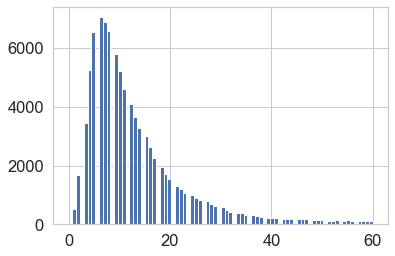

In [102]:
#Finding the trip duration 
# converting duration in min
metro_bike_trip_df['Duration']/=60  
metro_bike_trip_df['Duration'].hist(bins=80,range=(0,60))
plt.show()

#### It seems that majority of the trips are 5-30 minutes long beacuse according to LA metro rides less than 30 min are free for all pass type and after that they charge 1.75 dollar for each 30 min.

#### We are done with finding the popular bike, popular stations, popular location and popular trip. We will now find the popular passholder or the customer using the bikes and making maximum trips.

In [103]:
#Finding the famous passholder type according to plan duration
metro_bike_trip_df[['Trip_ID','Passholder_Type','Plan_Duration']].groupby(['Passholder_Type','Plan_Duration']).agg(['count'])/len(metro_bike_trip_df)*100

,,Trip_ID
,,count
Passholder_Type,Plan_Duration,
Flex Pass,365.0,7.369282
Monthly Pass,30.0,61.404549
Walk-up,0.0,31.226169


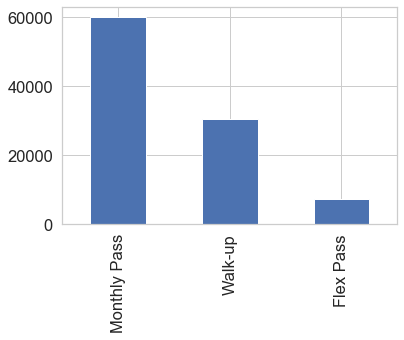

In [104]:
#Visually representing the passholder's type 
metro_bike_trip_df.Passholder_Type.value_counts().plot(kind='bar')
plt.show()

#### People generally prefer taking a monthly pass instead of walk-up and flex pass. We can confirm the above passholder type by calculating the plan duration.

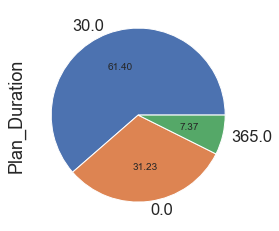

In [105]:
# Finding the Plan duration
metro_bike_trip_df.Plan_Duration.value_counts().plot(kind  ='pie', autopct='%.2f')
plt.show()

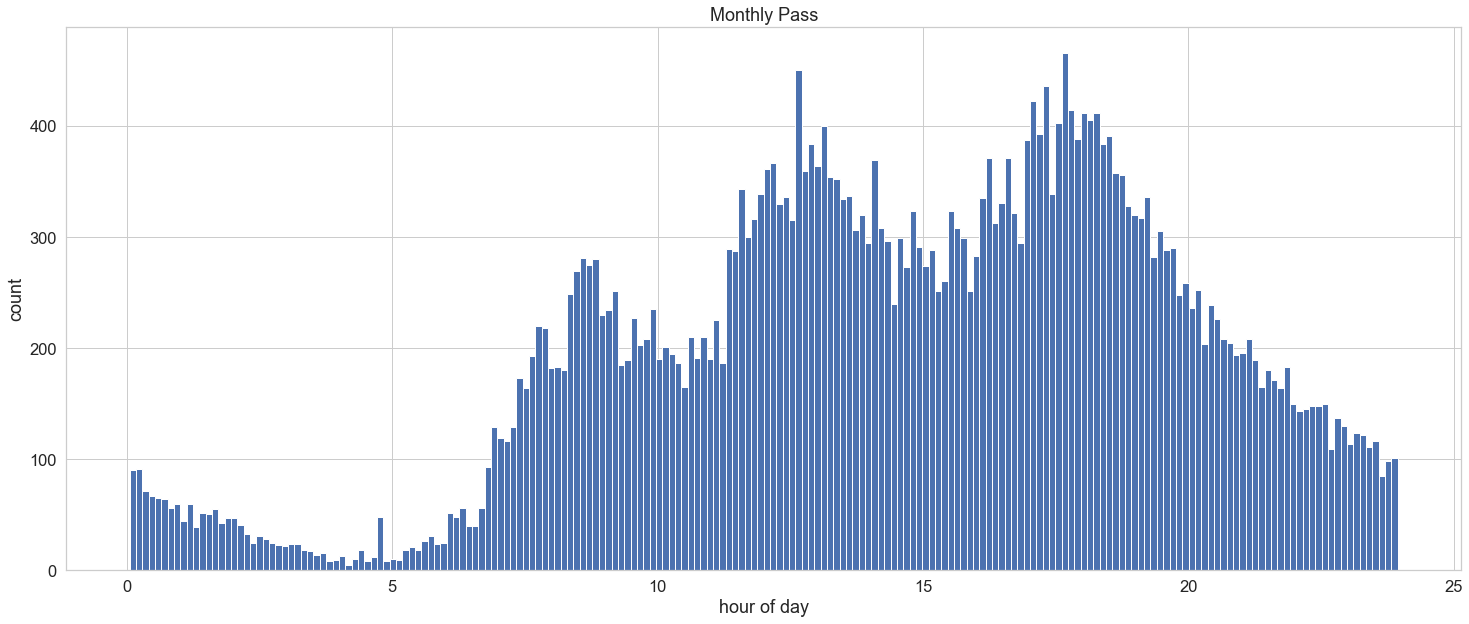

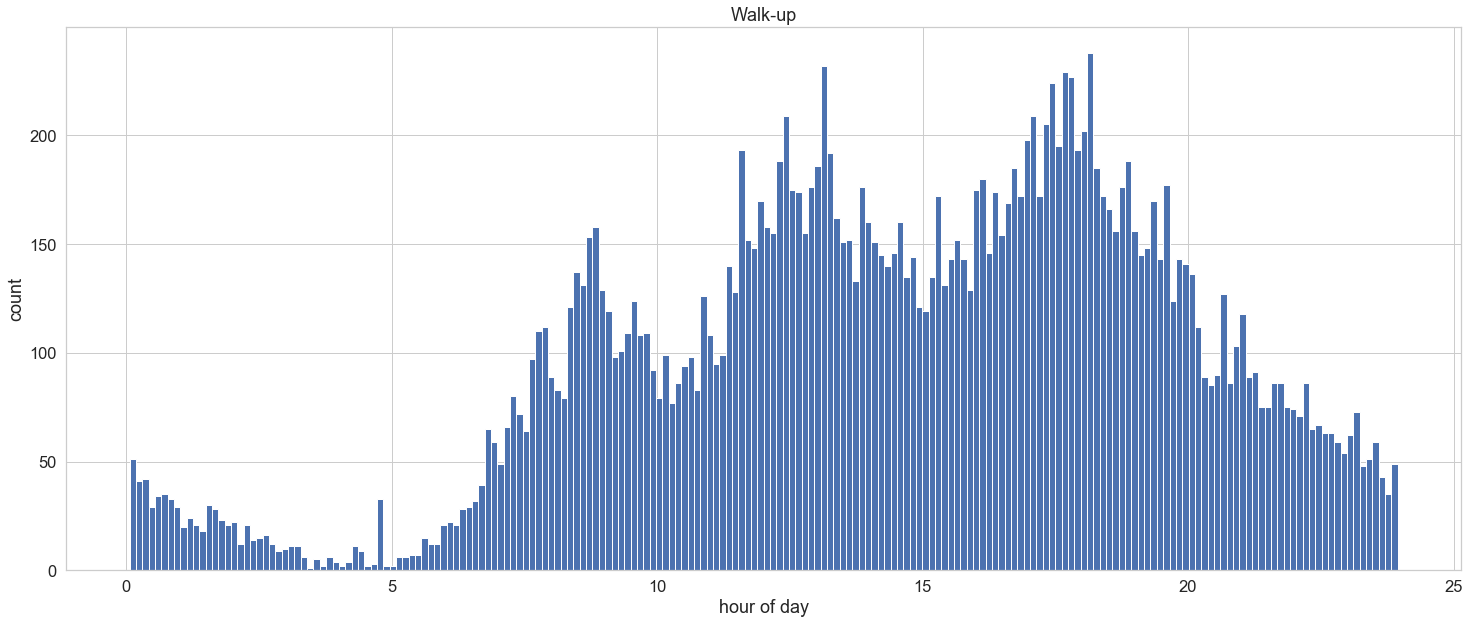

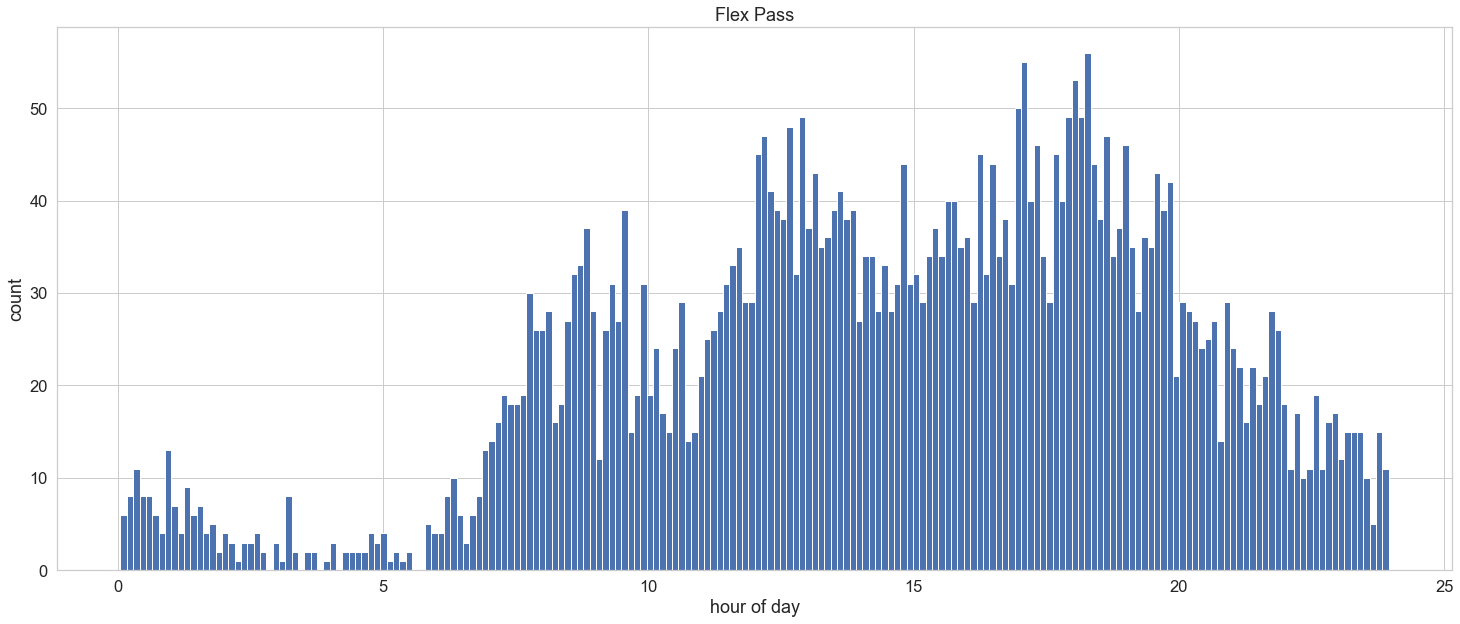

In [106]:
#Finding the peak time for different passholders
#Separating date and time of Start Time and End Time 

new_dates, new_times = zip(*[(d.date(),d.time()) for d in metro_bike_trip_df['Start_Time']])
metro_bike_trip_df = metro_bike_trip_df.assign(new_start_date=new_dates, new_start_time=new_times)

new_dates, new_times = zip(*[(d.date(),d.time()) for d in metro_bike_trip_df['End_Time']])
metro_bike_trip_df = metro_bike_trip_df.assign(new_end_date=new_dates, new_end_time=new_times)

peaktime=pd.DataFrame([(d.hour+d.minute/60) for d in metro_bike_trip_df['new_start_time']])
peaktime['Passholder_Type']=metro_bike_trip_df['Passholder_Type']
for peak_hour in ['Monthly Pass','Walk-up','Flex Pass']:
    (peaktime[peaktime['Passholder_Type']==peak_hour][0]).hist(bins=200,figsize=(25,10))
    plt.xlabel('hour of day')
    plt.ylabel('count')
    plt.title(peak_hour)
    plt.show()

#### With the above graph we can say that the peak time for all the different passholder is almost same just the count of customers differs. 

In [107]:
# Finding the co relation between different passholder type and  different stations
data = list()
for ph in ["Flex Pass", "Monthly Pass", "Walk-up"]:
    data.append(metro_bike_trip_df.loc[metro_bike_trip_df["Passholder_Type"] == ph, "Starting_Station_ID"].dropna().value_counts())

stations = pd.concat(data, axis=1, sort=False)
station_names = list(stations.index)
stations = stations.reset_index(drop=True)
stations.columns = ["Flex Pass", "Monthly Pass", "Walk-up"]
stations = stations.apply(lambda s: s/s.sum())

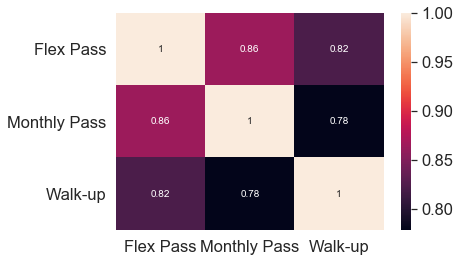

In [108]:
# Correlation Matrix
sns.heatmap(stations.corr(), annot=True)
plt.show()

#### The popularity of the different stations are relativelly equal betweeen different passes. We see the highest correlation between the flex and monthly pass.

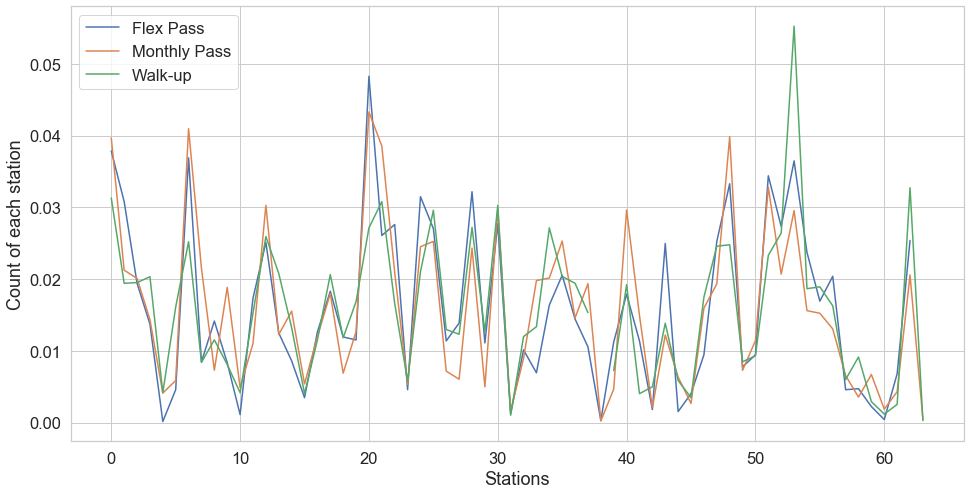

In [109]:
stations.plot(figsize=(16, 8))
plt.xlabel("Stations")
plt.ylabel("Count of each station")
plt.legend()

#### Many stations are very similar between the passes. Lets find the ones that differs the most between the monthly and daily pass.

In [110]:
diff = stations["Monthly Pass"] - stations["Walk-up"]
diff = diff.apply(abs).nlargest(5).index.map(lambda s: station_names[s])
print(" The 5 stations that differs most between the monthly and walk-up pass\n ",list(diff))

 The 5 stations that differs most between the monthly and walk-up pass
  [3069, 3030, 3014, 3064, 3016]


#### Bikes in some of these stations might be used daily so people over there prefer taking monthly pass instead of paying daily while some of those stations are used by people visiting near to that location as it may be a tourist location.

In [111]:
#Finding the trip duration by passholder type
# Calculating trip duration based on tripduration(Seconds)
trip_duration_for_passholder = pd.DataFrame()
trip_duration_for_passholder['Avg. Trip Duration'] = round(metro_bike_trip_df.groupby('Passholder_Type')['Duration'].mean(),2)
trip_duration_for_passholder = trip_duration_for_passholder.reset_index()
trip_duration_for_passholder['Passholder_Type'] = trip_duration_for_passholder['Passholder_Type'].astype('object')

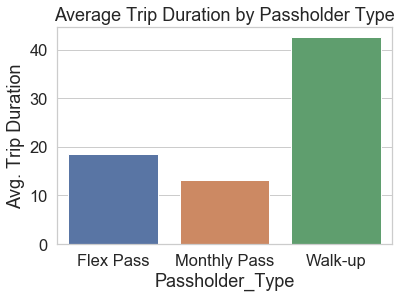

In [112]:
# Average Trip Duration by Passholder Type 
average_trip_plot = sns.barplot('Passholder_Type', 'Avg. Trip Duration', data = trip_duration_for_passholder)
plt.Figure(figsize=(15,12))
plt.title("Average Trip Duration by Passholder Type")
# for index, row in trip_duration_for_passholder.iterrows():
#     average_trip_plot.text(index,row['Avg. Trip Duration']-200,(str(row['Avg. Trip Duration'])+"  Seconds"), 
#              color='white', ha="center", fontsize = 10)
plt.show()

#### Even though monthly pass frequency is high, walk-up people genreally prefer to use bike for longer duration. So we can say that monthly pass user are one that use bikes for near by location. 

#### Our goal is to predict the number of people using walk-up, monthly pass or flex pass for future trips. 

# Performing Modeling

In [113]:
# To do so lets first find the distance between the starting and endind point by using starting latitude longitude with ending latitude longitude
l = []
for i in range(97825):
    l.append(distance_on_unit_sphere(metro_bike_trip_df['Starting_Station_Latitude'].iloc[i],
                                     metro_bike_trip_df['Starting_Station_Longitude'].iloc[i],
                                     metro_bike_trip_df['Ending_Station_Latitude'].iloc[i],
                                     metro_bike_trip_df['Ending_Station_Longitude'].iloc[i]))

In [114]:
temp = pd.DataFrame(data=[metro_bike_trip_df['Duration'],
                          metro_bike_trip_df['Starting_Station_Latitude'],
                          metro_bike_trip_df['Starting_Station_Longitude'],
                          metro_bike_trip_df['Ending_Station_Latitude'],
                          metro_bike_trip_df['Ending_Station_Longitude'],
                          metro_bike_trip_df['Plan_Duration']],
                          index=['Duration',
                                 'Starting_Station_Latitude',
                                 'Starting_Station_Longitude',
                                 'Ending_Station_Latitude',
                                 'Ending_Station_Longitude',
                                 'Plan_Duration'])

In [115]:
distance = pd.DataFrame({'Distance':l})
new_metro_bike_trip_df = temp.T
print("Shape of new train ",new_metro_bike_trip_df.shape)
print ("Shape of distance ",distance.shape)

Shape of new train  (97825, 6)
Shape of distance  (97825, 1)


In [116]:
new_metro_bike_trip_df = new_metro_bike_trip_df.reset_index(drop=True)
new_metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97825 entries, 0 to 97824
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Duration                    97825 non-null  float64
 1   Starting_Station_Latitude   97825 non-null  float64
 2   Starting_Station_Longitude  97825 non-null  float64
 3   Ending_Station_Latitude     97825 non-null  float64
 4   Ending_Station_Longitude    97825 non-null  float64
 5   Plan_Duration               97825 non-null  float64
dtypes: float64(6)
memory usage: 4.5 MB


In [117]:
new_metro_bike_trip_df = pd.concat([distance,
                         new_metro_bike_trip_df,
                         pd.get_dummies(data=metro_bike_trip_df['Passholder_Type']).reset_index(),
                         pd.get_dummies(data=metro_bike_trip_df['Trip_Route_Category'],drop_first=True).reset_index()],
                         axis=1)
new_metro_bike_trip_df = new_metro_bike_trip_df.drop('index',axis=1)
new_metro_bike_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97825 entries, 0 to 97824
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Distance                    97825 non-null  float64
 1   Duration                    97825 non-null  float64
 2   Starting_Station_Latitude   97825 non-null  float64
 3   Starting_Station_Longitude  97825 non-null  float64
 4   Ending_Station_Latitude     97825 non-null  float64
 5   Ending_Station_Longitude    97825 non-null  float64
 6   Plan_Duration               97825 non-null  float64
 7   Flex Pass                   97825 non-null  uint8  
 8   Monthly Pass                97825 non-null  uint8  
 9   Walk-up                     97825 non-null  uint8  
 10  Round Trip                  97825 non-null  uint8  
dtypes: float64(7), uint8(4)
memory usage: 5.6 MB


In [118]:
print("There are 3 different types of Passholder : ")
metro_bike_trip_df['Passholder_Type'].value_counts()

There are 3 different types of Passholder : 


Monthly Pass    60069
Walk-up         30547
Flex Pass        7209
Name: Passholder_Type, dtype: int64

### Performing modeling by using logistic regression to predict whether  the passholder type is "Walk-up" or "not"

In [119]:
# USING LOGISTIC REGRESSION TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Walk-up" OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Walk-up','logistic' )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 The classification report for Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22133
           1       1.00      1.00      1.00     10150

    accuracy                           1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Logistic Regression is: 
 [[22133     0]
 [    0 10150]]


#### With the help of Logistic Regression and through the results of confusion matrix we were able to predict the walk-up passholder accurately.

### Peforming Modeling by using Random forest classifier to predict whether the passholder type is "Monthly Pass" or "not"

In [120]:
# USING RANDOM FOREST CLASSIFIER TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Monthly Pass" OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Monthly Pass','random' )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The classification report for Random Forest is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12403
           1       1.00      1.00      1.00     19880

    accuracy                           1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Random Forest is: 
 [[12403     0]
 [    0 19880]

#### With the help of Random Forest Classifier and through the results of confusion matrix we were able to predict the monthly passholder accurately. 

### Peforming Modeling by using Decision Tree classifier to predict whether the passholder type is "Flex Pass" or "not"

In [121]:
# USING DECISION TREE TO PREDICT WHETHER THE PASSHOLDER TYPE IS "Flex Pass OR "Not"
modeling_techniques_and_prediction(new_metro_bike_trip_df, 'Flex Pass','decision' )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 The classification report for Decision Tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29905
           1       1.00      1.00      1.00      2378

    accuracy                           1.00     32283
   macro avg       1.00      1.00      1.00     32283
weighted avg       1.00      1.00      1.00     32283

The Confusion Matrix for Decision Tree is: 
 [[29905     0]
 [    0  2378]]


#### With the help of Decision Tree Classifier and through the results of confusion matrix we were able to predict the flex passholder accurately.

### Conclusion: 
* Successfully delivered and represented the popular stations,locations, bikes, trips and passholders
* Imputed the missing value for the location and visually represented the stations location on a map
* Visually represented the peak time of people using the bikes and also calculated the average duration of trips
* Finally with the help of passholder we demonstrated accurate models of the riding patterns of different passholder types. 
* Therefore, with all the above result, more people are likely to enroll for monthly pass which means the stations should be maintained and improved in order to increase more customers for building a good bike sharing network.